In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd
import matplotlib.image as mpimg
import random
from sklearn.metrics import precision_score, accuracy_score, f1_score


## Where our data selection comes from?
- Loading table with some information for the galaxies in your folder.
- many of these galaxies were selected based on the tree questions presented below

![Typical galaxy zoo question](/luidhy_docker/DELVEIMAGENS/EAFEXP2025/myfirstCNN/stab2093fig4.jpeg)

In [20]:
table = pd.read_csv("image_general_info.csv")
df_table = pd.DataFrame(table)
####creating a generic file path for the images in order to adapt it to any folder, change it for wherever you are going to put the png files
df_table['path_little_sample'] = 'images/' + df_table['FILENAME']
df_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 100 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         1500 non-null   int64  
 1   ra                                                 1500 non-null   float64
 2   dec                                                1500 non-null   float64
 3   iauname                                            1500 non-null   object 
 4   petro_theta                                        1500 non-null   float64
 5   petro_th50                                         1500 non-null   float64
 6   petro_th90                                         1500 non-null   float64
 7   elpetro_absmag_r                                   1500 non-null   float64
 8   sersic_nmgy_r                                      1500 non-null   float64
 9   redshif

- explore plot some variables from the table

In [19]:
df_table.head()

,file_path,class_bin,FILENAME,path_little_sample
0,images/J143252.80+054737.7.png,0,J143252.80+054737.7.png,images/J143252.80+054737.7.png
1,images/J004411.95+011428.9.png,0,J004411.95+011428.9.png,images/J004411.95+011428.9.png
2,images/J103928.61+050926.8.png,0,J103928.61+050926.8.png,images/J103928.61+050926.8.png
3,images/J163823.44+270844.7.png,0,J163823.44+270844.7.png,images/J163823.44+270844.7.png
4,images/J092223.39+083112.1.png,0,J092223.39+083112.1.png,images/J092223.39+083112.1.png


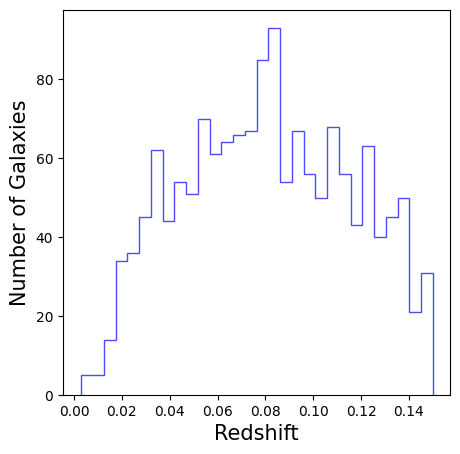

In [7]:
plt.figure(figsize=(5, 5))
plt.hist(df_table['redshift'], bins=30, color='blue', alpha=0.7,histtype = 'step')
plt.xlabel('Redshift', fontsize=15)
plt.ylabel('Number of Galaxies', fontsize=15)
plt.show()


# Lets Check some random beautiful images, or not


In [8]:
####plot some random images from your sample
def plot_random_images(df, column_name, n=10,save_path=None):
    """
    Plots `n` random images from the specified column in the dataframe it also
    skips any files that cannot be found or cause errors.

    Parameters to run this function:
        df (pd.DataFrame): The dataframe containing the file paths.
        column_name (str): The column name with the file paths.
        n (int): The number of images to plot.
    """
    #selecting random rows from the dataframe
    sampled_files = df[column_name].sample(min(n, len(df)))

    #ploting it 
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    axes = axes if n > 1 else [axes]  
    plotted_count = 0

    for ax, file_path in zip(axes, sampled_files):
        try:
            if os.path.exists(file_path):  #checking if the file is there
                image = mpimg.imread(file_path)
                ax.imshow(image)
                #ax.set_title(os.path.basename(file_path))
                ax.axis('off')
                plotted_count += 1
            else:
                print(f"File not found: {file_path}")
        except Exception as e:
            print(f"Error loading image {file_path}: {e}")
            ax.axis('off') 

    #removing extra axes if fewer than `n` images were plotted
    if plotted_count < n:
        for extra_ax in axes[plotted_count:]:
            extra_ax.axis('off')

    plt.tight_layout()
    
    #plt.show()
    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"Plot saved to {save_path}")

    plt.show()

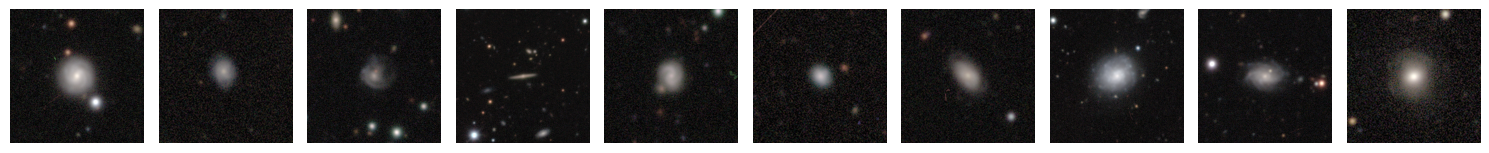

In [21]:
plot_random_images(df_table, column_name='path_little_sample', n=10)

# Lets create a CNN in order to try to classify it

In [14]:
###load this necessary package
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models

In [22]:
def load_images(file_paths):
    images = []
    for file in file_paths:
        img = image.load_img(file, target_size=(128, 128))  # Resize image to 128x128
        img_array = image.img_to_array(img)
        images.append(img_array)
    return np.array(images)

In [23]:
###load images and labels
file_paths = df_table['path_little_sample'].values
labels = df_table['class_bin'].values
filenames = df_table['FILENAME'].values
images = load_images(file_paths)

FileNotFoundError: [Errno 2] No such file or directory: 'images/J164843.01+354619.7.jpeg'

- at this point maybe you have some missing images, try run the 

In [24]:
valid_file_paths = []
valid_labels = []
valid_filenames = []

for file, label, filenames in zip(file_paths, labels, filenames ):
    if os.path.exists(file):  # Check if the image file exists
        valid_file_paths.append(file)
        valid_labels.append(label)
        valid_filenames.append(filenames)

# Create a DataFrame with only the valid paths
df_data_okay = pd.DataFrame({
    'file_path': valid_file_paths,
    'class_bin': valid_labels,
    'FILENAME' : valid_filenames
})

# Print the shape of the new DataFrame
print(f"Valid DataFrame shape: {df_data_okay.shape}")

# Optionally, save the valid DataFrame to a CSV for further use
df_data_okay.to_csv('files_okay.csv', index=False)

# Display the first few rows of the valid DataFrame
print(df_data_okay.head())


Valid DataFrame shape: (1489, 3)
                        file_path  class_bin                 FILENAME
0  images/J143252.80+054737.7.png          0  J143252.80+054737.7.png
1  images/J004411.95+011428.9.png          0  J004411.95+011428.9.png
2  images/J103928.61+050926.8.png          0  J103928.61+050926.8.png
3  images/J163823.44+270844.7.png          0  J163823.44+270844.7.png
4  images/J092223.39+083112.1.png          0  J092223.39+083112.1.png


In [25]:
###from here and after the valid_df is the table containing your main information
df_data_okay['class_bin'] = df_data_okay['class_bin'].replace(2, 1)
df_data_okay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  1489 non-null   object
 1   class_bin  1489 non-null   int64 
 2   FILENAME   1489 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [26]:
###load images and labels
file_paths = df_data_okay['file_path'].values
labels = df_data_okay['class_bin'].values
filenames = df_data_okay['FILENAME'].values
images = load_images(file_paths)

In [27]:
images = images / 255.0

In [28]:
#splitting  data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [29]:
#a very simple cnn
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

- HOw many parameter do you have on your model?
- try to modify some layers in order to verify how the number of parameters change.

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

In [34]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
28/28 [==============================] - 5s 31ms/step - loss: 0.6993 - accuracy: 0.4994 - val_loss: 0.6733 - val_accuracy: 0.6644
Epoch 2/20
28/28 [==============================] - 1s 18ms/step - loss: 0.6191 - accuracy: 0.6573 - val_loss: 0.6058 - val_accuracy: 0.6644
Epoch 3/20
28/28 [==============================] - 0s 18ms/step - loss: 0.4890 - accuracy: 0.7626 - val_loss: 0.4813 - val_accuracy: 0.7718
Epoch 4/20
28/28 [==============================] - 0s 17ms/step - loss: 0.3689 - accuracy: 0.8320 - val_loss: 0.4436 - val_accuracy: 0.7819
Epoch 5/20
28/28 [==============================] - 0s 17ms/step - loss: 0.3186 - accuracy: 0.8712 - val_loss: 0.4812 - val_accuracy: 0.7785
Epoch 6/20
28/28 [==============================] - 1s 18ms/step - loss: 0.2437 - accuracy: 0.9026 - val_loss: 0.5048 - val_accuracy: 0.7919
Epoch 7/20
28/28 [==============================] - 1s 19ms/step - loss: 0.1949 - accuracy: 0.9317 - val_loss: 0.5743 - val_accuracy: 0.7617
Epoch 8/20
28

In [64]:
model.save('simple_cnn_model.h5')

In [36]:
#Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)


10/10 [==============================] - 0s 4ms/step


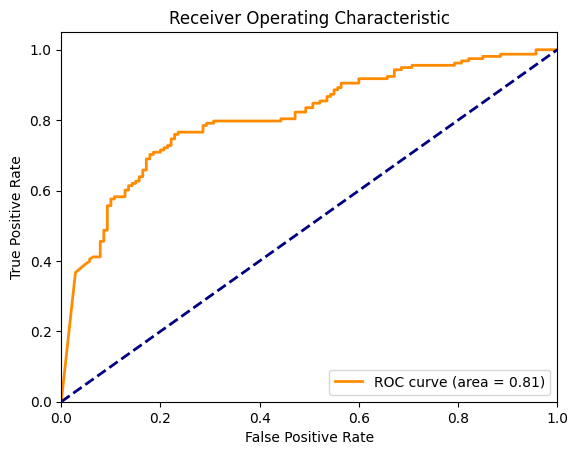

In [37]:
#1. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


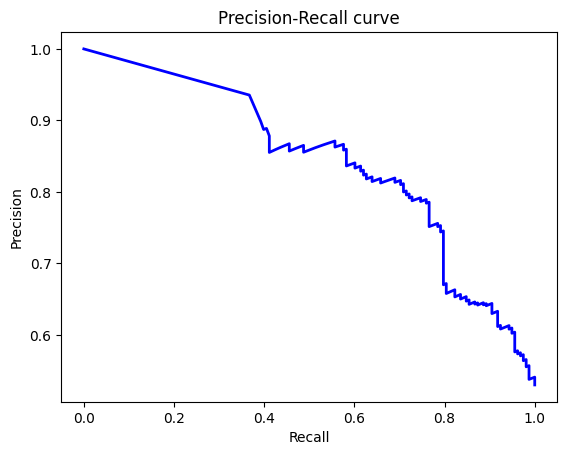

In [38]:
# 2. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

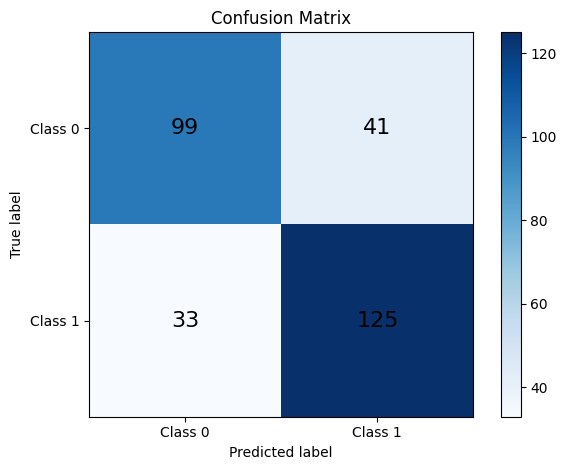

In [39]:
# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center", color="black", fontsize=16)


tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

- Print some general metrics here, just in case. Using it and previoous plot u will be able to verify the improvementes on your model

In [42]:
precision = precision_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)


print(f'Precision: {precision:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')


Precision: 0.7530
Accuracy: 0.7517
F1 Score: 0.7716


: 

## What you gonna do to increase the metrics of your model to have the best classification?